# Тема: Численное решение дифференциальных уравнений методом Рунге-Кутты

## Topic: Numerical Solution of Differential Equations using the Runge-Kutta Method


## 1. Теоретическая справка: Метод Рунге-Кутты
## Theoretical Background: Runge-Kutta Method

Метод Рунге-Кутты (Runge-Kutta Method) — это семейство итерационных методов приближённого решения обыкновенных дифференциальных уравнений (ОДУ). Наиболее известным и часто используемым является метод Рунге-Кутты 4-го порядка (RK4).
The Runge-Kutta Method is a family of iterative methods for the approximate solution of ordinary differential equations (ODEs). The most famous and frequently used is the 4th-order Runge-Kutta method (RK4).

### Основная идея
### Main Idea

Для уравнения вида $\frac{dy}{dt} = f(t, y)$ метод RK4 вычисляет следующее значение $y_{n+1}$ на основе текущего $y_n$ используя взвешенное среднее четырех приращений (наклонов):

For an equation of the form $\frac{dy}{dt} = f(t, y)$, the RK4 method calculates the next value $y_{n+1}$ based on the current $y_n$ using a weighted average of four increments (slopes):

$$
\begin{aligned}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right) \\
k_3 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right) \\
k_4 &= f(t_n + h, y_n + h k_3) \\
y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}
$$

Где $h$ — шаг интегрирования.

Where $h$ is the integration step size.

### Преимущества метода RK4
### Advantages of RK4 Method

1. **Точность:** Погрешность на одном шаге пропорциональна $h^5$, а глобальная погрешность — $h^4$. Это обеспечивает высокий баланс между точностью и вычислительной стоимостью.
2. **Самозапускаемость:** В отличие от многошаговых методов (например, Адамса), RK4 не требует значений из предыдущих шагов для начала работы, только текущее состояние.
3. **Устойчивость:** Достаточно устойчив для широкого класса задач, не являющихся жесткими (stiff).
4. **Простота реализации:** Алгоритм легко кодируется и понимается.

1. **Accuracy:** The local truncation error is proportional to $h^5$, and the global error is proportional to $h^4$. This provides a high balance between accuracy and computational cost.
2. **Self-starting:** Unlike multistep methods (e.g., Adams), RK4 does not require values from previous steps to start, only the current state.
3. **Stability:** Sufficiently stable for a wide class of non-stiff problems.
4. **Ease of Implementation:** The algorithm is easy to code and understand.

In [1]:
# Установка пакетов (раскомментируйте при первом запуске)
# Install packages (uncomment on first run)
# using Pkg
# Pkg.add(["DifferentialEquations", "GLMakie", "Plots"])

# Импорт библиотек
# Import libraries
using DifferentialEquations
# using GLMakie
using Plots
using LinearAlgebra

# Включаем интерактивный режим для Makie (если работаете локально)
# Enable interactive mode for Makie (if working locally)
# GLMakie.activate!()

println("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## 2. Пример 1: Аттрактор Лоренца (Lorenz Attractor)
## 2. Example 1: Lorenz Attractor

Система Лоренца — это система из трех нелинейных ОДУ, известная своим хаотическим поведением и формой "бабочки". Она возникла при моделировании конвекции в атмосфере.

The Lorenz system is a system of three nonlinear ODEs, known for its chaotic behavior and "butterfly" shape. It originated from modeling atmospheric convection.

$$
\begin{aligned}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{aligned}
$$

Стандартные параметры: $\sigma = 10$, $\rho = 28$, $\beta = 8/3$.

Standard parameters: $\sigma = 10$, $\rho = 28$, $\beta = 8/3$.

In [ ]:
# Функция, описывающая систему Лоренца
# Function describing the Lorenz system
function lorenz!(du, u, p, t)
    σ, ρ, β = p
    x, y, z = u
    
    du[1] = σ * (y - x)
    du[2] = x * (ρ - z) - y
    du[3] = x * y - β * z
end

# Параметры и начальные условия
# Parameters and initial conditions
p_lorenz = (10.0, 28.0, 8/3)
u0_lorenz = [1.0, 0.0, 0.0]
tspan_lorenz = (0.0, 100.0)

# Создание задачи ОДУ
# Creating the ODE problem
prob_lorenz = ODEProblem(lorenz!, u0_lorenz, tspan_lorenz, p_lorenz)

# Решение с использованием явного метода RK4
# Solving using explicit RK4 method
# Change to Tsit5() for a more efficient adaptive solver if needed
# sol_lorenz = solve(prob_lorenz, Tsit5(), saveat=0.01)
# also change dt and saveat for better performance if needed
sol_lorenz = solve(prob_lorenz, RK4(), dt=0.001, saveat=0.01)

println("✅ Lorenz system solved! Number of time points: $(length(sol_lorenz.t))")

✅ Lorenz system solved! Number of time points: 10001


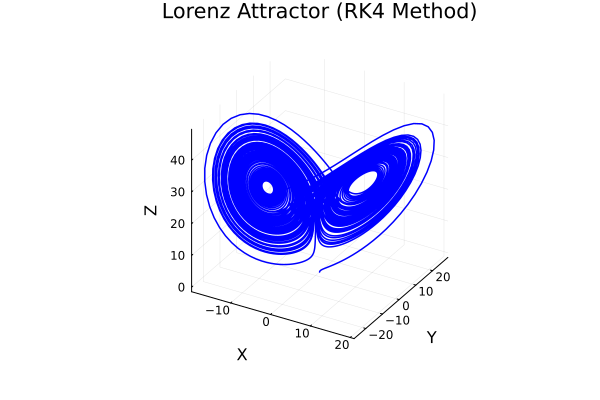

In [7]:
# Статическая 3D визуализация аттрактора Лоренца
# Static 3D visualization of Lorenz attractor

# Статическая 3D визуализация аттрактора Лоренца (Plots.jl)
# Static 3D visualization of Lorenz attractor (Plots.jl)
gr()  # Используем бэкенд GR для 3D графиков
plot(
    sol_lorenz[1, :],
    sol_lorenz[2, :],
    sol_lorenz[3, :],
    projection = "3d",
    xlabel = "X", ylabel = "Y", zlabel = "Z",
    title = "Lorenz Attractor (RK4 Method)",
    color = :blue,
    linewidth = 1.5,
    legend = false,
    camera = (30, 30),
    background_color = :white
)

In [14]:
# Анимация траектории Лоренца с помощью Plots.jl
# Animation of Lorenz trajectory using Plots.jl

# Функция создания анимации
# Animation creation function
function animate_lorenz(sol; filename = "lorenz_attractor.gif", fps = 20)
    x = sol[1, :]
    y = sol[2, :]
    z = sol[3, :]
    
    # Создаём кадры анимации
    # Create animation frames
    anim = @animate for i in 1:10:length(x)
        plot(
            x[1:i], y[1:i], z[1:i],
            projection = "3d",
            xlabel = "X", ylabel = "Y", zlabel = "Z",
            title = "Lorenz Attractor - Step $i",
            color = :blue,
            linewidth = 2,
            legend = false,
            camera = (30 + 0.5*i, 25),  # вращение камеры
            xlims = (minimum(x), maximum(x)),
            ylims = (minimum(y), maximum(y)),
            zlims = (minimum(z), maximum(z)),
            background_color = :white
        )
        # Добавляем текущую точку
        # Add current point
        scatter!([x[i]], [y[i]], [z[i]], color = :red, markersize = 8, label = "Current")
    end
    
    # Сохранение анимации
    # Save animation
    gif(anim, filename, fps = fps)
    println("🎬 Animation saved as '$filename'")
    return filename
end

# Запуск анимации (раскомментируйте для генерации)
# Run animation (uncomment to generate)
img = animate_lorenz(sol_lorenz)


🎬 Animation saved as 'lorenz_attractor.gif'


┌ Info: Saved animation to c:\Users\Александр\Documents\Projects2026\JuliaProg\JuliaPrograms\lorenz_attractor.gif
└ @ Plots C:\Users\Александр\.julia\packages\Plots\GIume\src\animation.jl:156


"lorenz_attractor.gif"

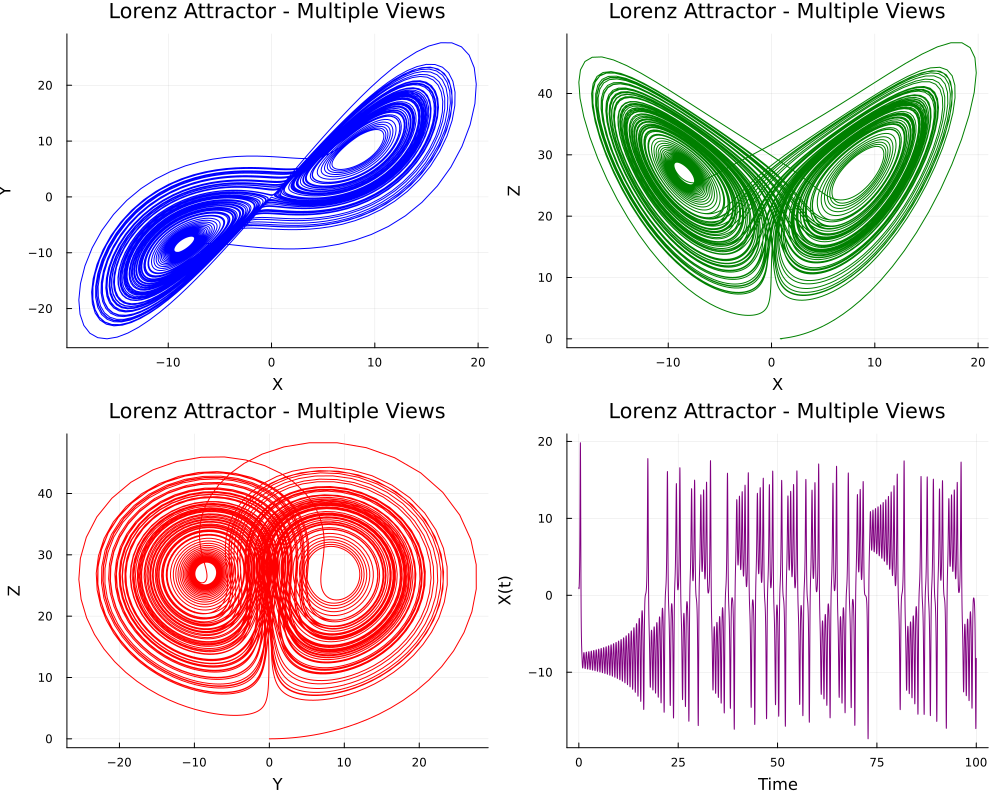

In [15]:
# 2D проекции аттрактора Лоренца для лучшего понимания структуры
# 2D projections of Lorenz attractor for better structure understanding

p1 = plot(sol_lorenz[1, :], sol_lorenz[2, :], 
          xlabel = "X", ylabel = "Y", title = "XY Projection",
          color = :blue, linewidth = 1, legend = false)

p2 = plot(sol_lorenz[1, :], sol_lorenz[3, :], 
          xlabel = "X", ylabel = "Z", title = "XZ Projection",
          color = :green, linewidth = 1, legend = false)

p3 = plot(sol_lorenz[2, :], sol_lorenz[3, :], 
          xlabel = "Y", ylabel = "Z", title = "YZ Projection",
          color = :red, linewidth = 1, legend = false)

p4 = plot(sol_lorenz.t, sol_lorenz[1, :], 
          xlabel = "Time", ylabel = "X(t)", title = "X vs Time",
          color = :purple, linewidth = 1, legend = false)

plot(p1, p2, p3, p4, layout = (2, 2), size = (1000, 800), 
     title = "Lorenz Attractor - Multiple Views")

## 3. Пример 2: Аттрактор Рёсслера (Rössler Attractor)
## 3. Example 2: Rössler Attractor

Аттрактор Рёсслера проще системы Лоренца (только одно нелинейное слагаемое), но также демонстрирует хаос. Визуально он напоминает закрученную ленту.

The Rössler attractor is simpler than the Lorenz system (only one nonlinear term), but also demonstrates chaos. Visually, it resembles a twisted band.

$$
\begin{aligned}
\frac{dx}{dt} &= -y - z \\
\frac{dy}{dt} &= x + ay \\
\frac{dz}{dt} &= b + z(x - c)
\end{aligned}
$$

Параметры: $a = 0.2$, $b = 0.2$, $c = 5.7$.

Parameters: $a = 0.2$, $b = 0.2$, $c = 5.7$.

In [16]:
# Функция Рёсслера
# Rössler function
function rossler!(du, u, p, t)
    a, b, c = p
    x, y, z = u
    
    du[1] = -y - z
    du[2] = x + a * y
    du[3] = b + z * (x - c)
end

# Параметры и решение
# Parameters and solution
p_rossler = (0.2, 0.2, 5.7)
u0_rossler = [1.0, 1.0, 0.0]
tspan_rossler = (0.0, 200.0)

prob_rossler = ODEProblem(rossler!, u0_rossler, tspan_rossler, p_rossler)

# Решение методом RK4
# Solution using RK4 method
sol_rossler = solve(prob_rossler, RK4(), dt=0.01, saveat=0.05)

println("✅ Rössler system solved! Number of time points: $(length(sol_rossler.t))")

✅ Rössler system solved! Number of time points: 4001


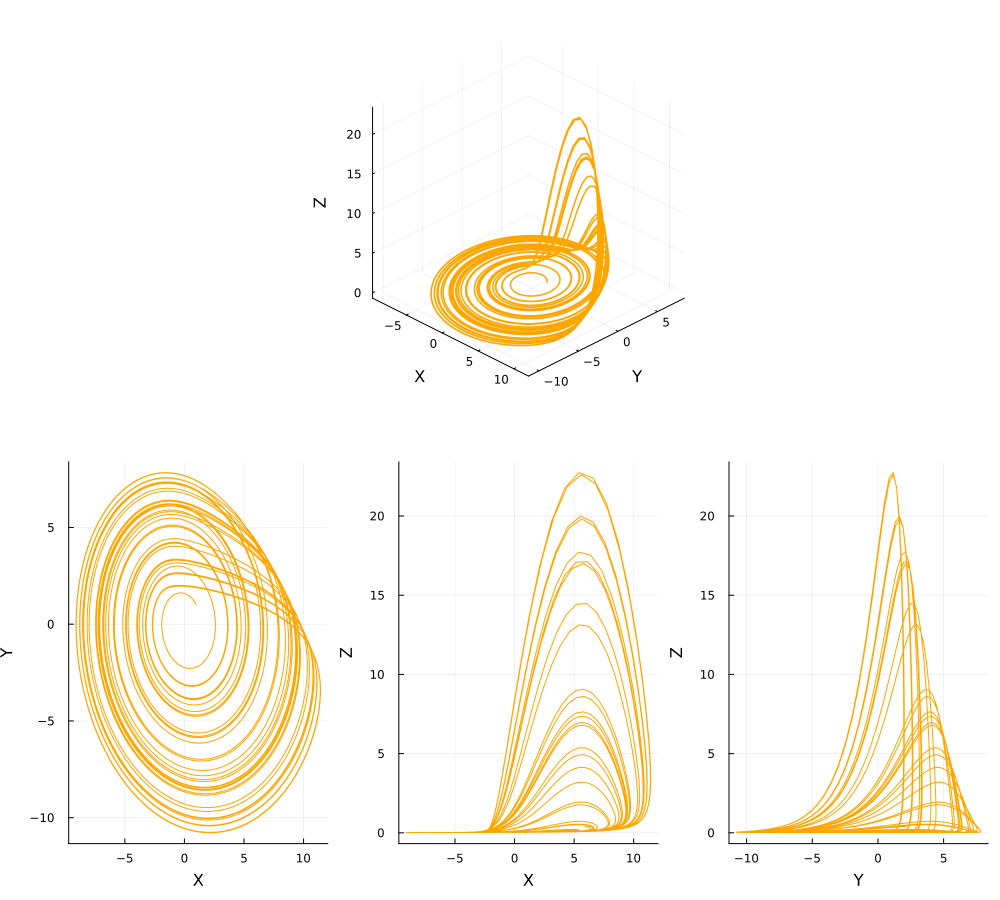

In [17]:
# Визуализация аттрактора Рёсслера (3D + 2D проекции)
# Rössler attractor visualization (3D + 2D projections)

# 3D график
# 3D plot
p3d = plot(
    sol_rossler[1, :], sol_rossler[2, :], sol_rossler[3, :],
    proj = "3d",
    xlabel = "X", ylabel = "Y", zlabel = "Z",
    title = "Rössler Attractor (RK4)",
    color = :orange,
    linewidth = 1.5,
    legend = false,
    camera = (45, 30),
    background_color = :white
)

# 2D проекции
# 2D projections
p_xy = plot(sol_rossler[1, :], sol_rossler[2, :], 
            xlabel = "X", ylabel = "Y", title = "XY", 
            color = :orange, linewidth = 1, legend = false)
p_xz = plot(sol_rossler[1, :], sol_rossler[3, :], 
            xlabel = "X", ylabel = "Z", title = "XZ", 
            color = :orange, linewidth = 1, legend = false)
p_yz = plot(sol_rossler[2, :], sol_rossler[3, :], 
            xlabel = "Y", ylabel = "Z", title = "YZ", 
            color = :orange, linewidth = 1, legend = false)

# Компоновка
# Layout
plot(p3d, p_xy, p_xz, p_yz, layout = @layout([a; grid(1, 3)]), 
     size = (1000, 900), title = "")

In [19]:
# Анимация для аттрактора Рёсслера
# Animation for Rössler attractor

function animate_rossler(sol; filename = "rossler_attractor.gif", fps = 20)
    x = sol[1, :]
    y = sol[2, :]
    z = sol[3, :]
    
    anim = @animate for i in 1:15:length(x)
        plot(
            x[1:i], y[1:i], z[1:i],
            proj = "3d",
            xlabel = "X", ylabel = "Y", zlabel = "Z",
            title = "Rössler Attractor - Step $i",
            color = :orange,
            linewidth = 2,
            legend = false,
            camera = (45 + 0.3*i, 30),
            xlims = (-15, 15), ylims = (-15, 15), zlims = (0, 30),
            background_color = :white
        )
        scatter!([x[i]], [y[i]], [z[i]], color = :red, markersize = 8, label = "Current")
    end
    
    gif(anim, filename, fps = fps)
    println("🎬 Animation saved as '$filename'")
    return filename
end

animate_rossler(sol_rossler)  # Раскомментируйте для генерации

🎬 Animation saved as 'rossler_attractor.gif'


┌ Info: Saved animation to c:\Users\Александр\Documents\Projects2026\JuliaProg\JuliaPrograms\rossler_attractor.gif
└ @ Plots C:\Users\Александр\.julia\packages\Plots\GIume\src\animation.jl:156


"rossler_attractor.gif"

## 4. Сравнение методов: RK4 vs Euler
## 4. Method Comparison: RK4 vs Euler

Давайте сравним точность метода Рунге-Кутты 4-го порядка с простым методом Эйлера на примере системы Лоренца.

Let's compare the accuracy of the 4th-order Runge-Kutta method with the simple Euler method using the Lorenz system as an example.

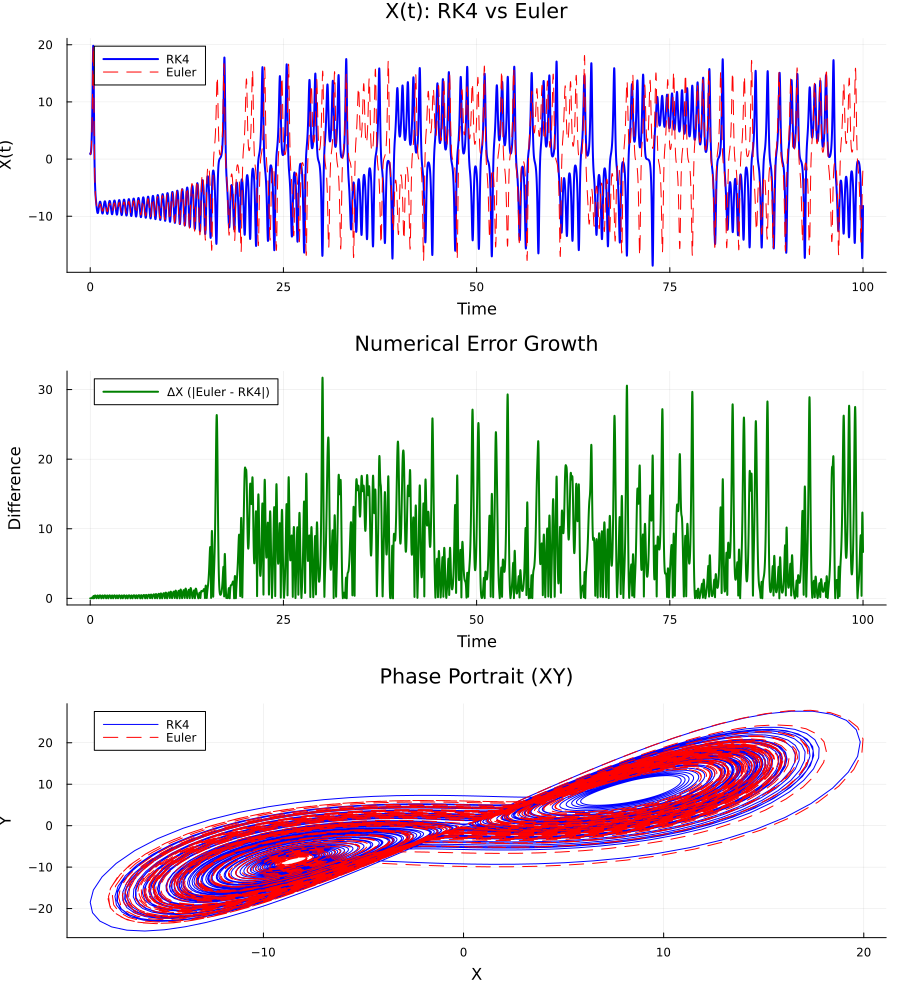

In [21]:
# Сравнение RK4 и Эйлера
# Comparison of RK4 and Euler

# Решение методом Эйлера с теми же параметрами
# Solution with Euler method - same parameters
sol_euler = solve(prob_lorenz, Euler(), dt=0.001, saveat=0.01)

# Временной ряд X для обоих методов
# X time series for both methods
p1 = plot(
    sol_lorenz.t, sol_lorenz[1, :], 
    label = "RK4", color = :blue, linewidth = 2,
    xlabel = "Time", ylabel = "X(t)", title = "X(t): RK4 vs Euler"
)
plot!(sol_euler.t, sol_euler[1, :], label = "Euler", color = :red, linestyle = :dash)

# Разница между методами (интерполируем на общую сетку)
# Difference between methods
p2 = plot(
    sol_lorenz.t, abs.(sol_euler(sol_lorenz.t)[1, :] - sol_lorenz[1, :]),
    label = "ΔX (|Euler - RK4|)", color = :green, linewidth = 2,
    xlabel = "Time", ylabel = "Difference", title = "Numerical Error Growth"
)

# Фазовый портрет: сравнение траекторий в XY-плоскости
# Phase portrait: trajectory comparison in XY plane
p3 = plot(
    sol_lorenz[1, :], sol_lorenz[2, :],
    label = "RK4", color = :blue, linewidth = 1,
    xlabel = "X", ylabel = "Y", title = "Phase Portrait (XY)"
)
plot!(sol_euler[1, :], sol_euler[2, :], label = "Euler", color = :red, linestyle = :dash)

plot(p1, p2, p3, layout = (3, 1), size = (900, 1000))

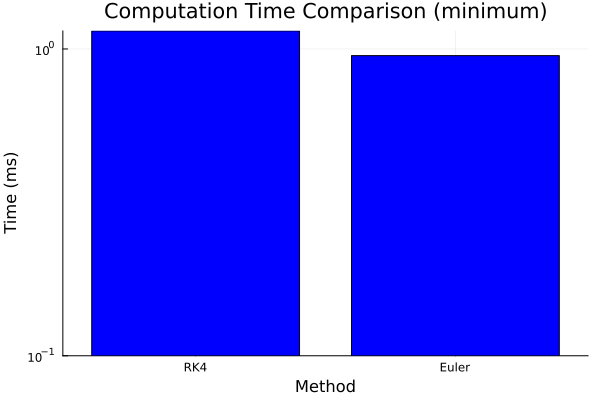

⏱️  Performance Comparison:
RK4:  1.1454 ms
Euler: 0.9512 ms


In [23]:
# Сравнение времени вычислений
# Computation time comparison

using BenchmarkTools

# Бенчмарк для RK4
# Benchmark for RK4
rk4_time = @benchmark solve($prob_lorenz, RK4(), dt=0.01, saveat=0.05)

# Бенчмарк для Эйлера
# Benchmark for Euler
euler_time = @benchmark solve($prob_lorenz, Euler(), dt=0.01, saveat=0.05)

# Визуализация результатов бенчмарка
# Visualize benchmark results

methods = ["RK4", "Euler"]
times_ms = [minimum(rk4_time.times), minimum(euler_time.times)] ./ 1e6

display(bar(
    methods, times_ms,
    xlabel = "Method", ylabel = "Time (ms)",
    title = "Computation Time Comparison (minimum)",
    color = [:blue :red],
    legend = false,
    yaxis = :log
))

println("⏱️  Performance Comparison:")
println("="^50)
println("RK4:  $(minimum(rk4_time.times) / 1e6) ms")
println("Euler: $(minimum(euler_time.times) / 1e6) ms")
println("="^50)

## 5. Эффект бабочки: Чувствительность к начальным условиям
## 5. Butterfly Effect: Sensitivity to Initial Conditions

В хаотических системах малейшее изменение начальных условий приводит к экспоненциальному расхождению траекторий. Продемонстрируем это на системе Лоренца.

In chaotic systems, the slightest change in initial conditions leads to exponential divergence of trajectories. Let's demonstrate this with the Lorenz system.

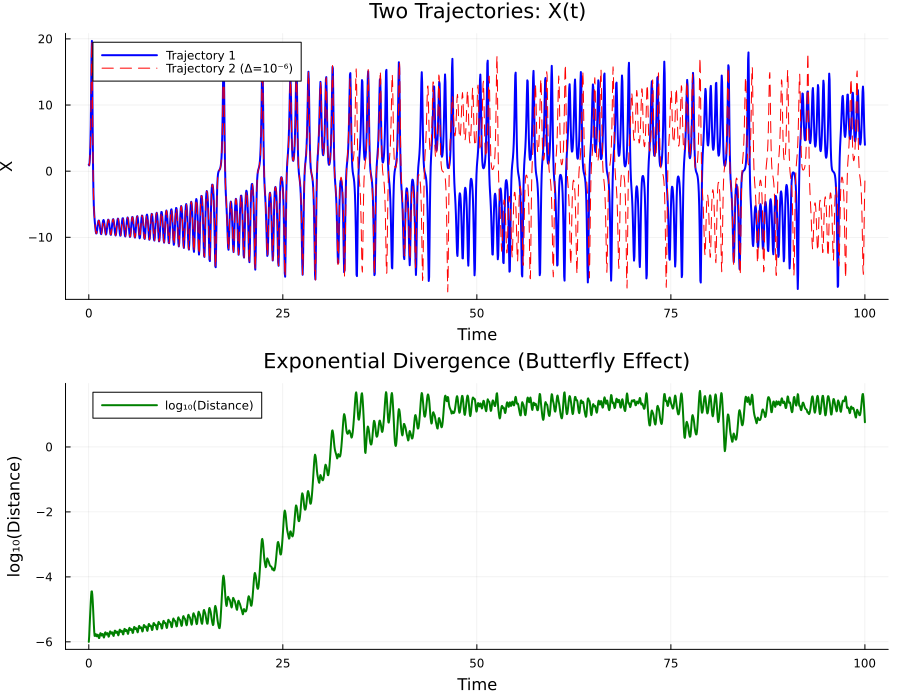

In [24]:
# Две траектории с почти одинаковыми начальными условиями
# Two trajectories with nearly identical initial conditions

u0_1 = [1.0, 0.0, 0.0]
u0_2 = [1.0 + 1e-6, 0.0, 0.0]  # Разница в 10^-6

prob1 = ODEProblem(lorenz!, u0_1, tspan_lorenz, p_lorenz)
prob2 = ODEProblem(lorenz!, u0_2, tspan_lorenz, p_lorenz)

sol1 = solve(prob1, RK4(), dt=0.01, saveat=0.05)
sol2 = solve(prob2, RK4(), dt=0.01, saveat=0.05)

# Вычисление расстояния между траекториями
# Calculate distance between trajectories
distance = sqrt.((sol1[1, :] .- sol2[1, :]).^2 + 
                 (sol1[2, :] .- sol2[2, :]).^2 + 
                 (sol1[3, :] .- sol2[3, :]).^2)

# Визуализация
# Visualization
p1 = plot(
    sol1.t, sol1[1, :], label = "Trajectory 1", color = :blue, linewidth = 2,
    xlabel = "Time", ylabel = "X", title = "Two Trajectories: X(t)"
)
plot!(sol2.t, sol2[1, :], label = "Trajectory 2 (Δ=10⁻⁶)", color = :red, linestyle = :dash)

p2 = plot(
    sol1.t, log10.(distance .+ 1e-10),
    label = "log₁₀(Distance)", color = :green, linewidth = 2,
    xlabel = "Time", ylabel = "log₁₀(Distance)", 
    title = "Exponential Divergence (Butterfly Effect)"
)

plot(p1, p2, layout = (2, 1), size = (900, 700))

In [26]:
# Анимация расхождения двух траекторий
# Animation of two trajectories diverging

function animate_butterfly(sol1, sol2; filename = "butterfly_effect.gif", fps = 15)
    x1, y1, z1 = sol1[1, :], sol1[2, :], sol1[3, :]
    x2, y2, z2 = sol2[1, :], sol2[2, :], sol2[3, :]
    
    anim = @animate for i in 1:20:length(x1)
        plot(
            x1[1:i], y1[1:i], z1[1:i],
            proj = "3d",
            xlabel = "X", ylabel = "Y", zlabel = "Z",
            title = "Butterfly Effect - Step $i",
            color = :blue, linewidth = 2, label = "Trajectory 1",
            camera = (30, 25),
            background_color = :white
        )
        plot!(
            x2[1:i], y2[1:i], z2[1:i],
            color = :red, linewidth = 2, linestyle = :dash, label = "Trajectory 2"
        )
        scatter!([x1[i], x2[i]], [y1[i], y2[i]], [z1[i], z2[i]], 
                 color = [:blue :red], markersize = 8, label = "")
    end
    
    gif(anim, filename, fps = fps)
    println("🎬 Animation saved as '$filename'")
    return filename
end

animate_butterfly(sol1, sol2)  # Раскомментируйте для генерации


🎬 Animation saved as 'butterfly_effect.gif'


┌ Info: Saved animation to c:\Users\Александр\Documents\Projects2026\JuliaProg\JuliaPrograms\butterfly_effect.gif
└ @ Plots C:\Users\Александр\.julia\packages\Plots\GIume\src\animation.jl:156


"butterfly_effect.gif"

## 6. Задание для самостоятельной работы
## 6. Homework Assignment

1. **Измените параметры системы Лоренца** (например, $\rho = 15$). Как изменится поведение системы? Исчезнет ли хаос?
2. **Попробуйте решить систему методом Эйлера** (`Euler()`) и сравните время вычислений и визуальный результат с RK4.
3. **Создайте анимацию**, где две траектории начинаются с очень близких начальных условий (отличающихся на $10^{-6}$). Наблюдайте, как они расходятся (эффект бабочки).
4. **Исследуйте аттрактор Чена** (Chen attractor) — другую хаотическую систему.

1. **Change the Lorenz system parameters** (e.g., $\rho = 15$). How does the system behavior change? Does chaos disappear?
2. **Try solving the system with Euler's method** (`Euler()`) and compare computation time and visual results with RK4.
3. **Create an animation** where two trajectories start with very close initial conditions (differing by $10^{-6}$). Observe how they diverge (butterfly effect).
4. **Investigate the Chen attractor** — another chaotic system.

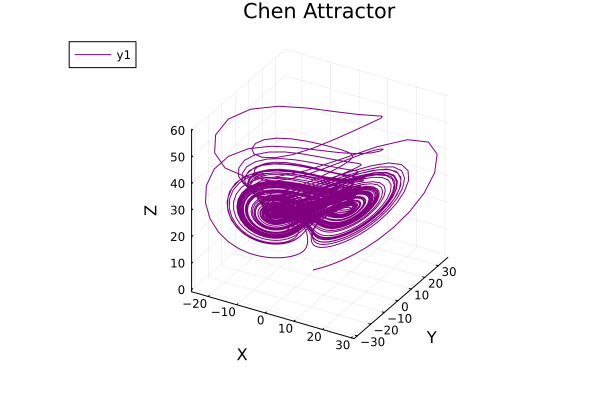

📚 Chen attractor template ready!


In [31]:
# Шаблон для исследования аттрактора Чена (бонусное задание)
# Template for investigating Chen attractor (bonus assignment)

function chen!(du, u, p, t)
    a, b, c = p
    x, y, z = u
    
    du[1] = a * (y - x)
    du[2] = (c - a) * x - x * z + c * y
    du[3] = x * y - b * z
end

# Параметры Чена (раскомментируйте для запуска)
# Chen parameters (uncomment to run)
p_chen = (35.0, 3.0, 28.0)
u0_chen = [1.0, 1.0, 1.0]
tspan_chen = (0.0, 50.0)
prob_chen = ODEProblem(chen!, u0_chen, tspan_chen, p_chen)
sol_chen = solve(prob_chen, RK4(), dt=0.001, saveat=0.01)

# Визуализация (если раскомментируете выше)
# Visualization (if uncommented above)
fig =plot(sol_chen[1,:], sol_chen[2,:], sol_chen[3,:], 
    proj="3d", xlabel="X", ylabel="Y", zlabel="Z", 
    title="Chen Attractor", color=:purple, linewidth=1)
display(fig)

println("📚 Chen attractor template ready!")


## 7. Заключение
## 7. Conclusion

В этой части мы рассмотрели:
- Теорию метода Рунге-Кутты 4-го порядка
- Применение RK4 к хаотическим системам (Лоренц, Рёсслер)
- Сравнение с методом Эйлера
- Эффект бабочки и чувствительность к начальным условиям

Julia в сочетании с `DifferentialEquations.jl` и `Plots.jl` позволяет решать сложные задачи численного интегрирования лаконично и эффективно.

In this part, we covered:
- Theory of the 4th-order Runge-Kutta method
- Application of RK4 to chaotic systems (Lorenz, Rössler)
- Comparison with Euler's method
- Butterfly effect and sensitivity to initial conditions

Julia combined with `DifferentialEquations.jl` and `Plots.jl` allows solving complex numerical integration problems concisely and efficiently.

In [33]:
# Сохранение результатов (опционально)
# Save results (optional)

using CSV, DataFrames

# Сохранить данные траектории Лоренца в CSV
# Save Lorenz trajectory data to CSV
df_lorenz = DataFrame(
    x = sol_lorenz[1, :], 
    y = sol_lorenz[2, :], 
    z = sol_lorenz[3, :], 
    t = sol_lorenz.t
)

CSV.write("lorenz_trajectory.csv", df_lorenz)
println("💾 Data saved to 'lorenz_trajectory.csv'")

# Сохранение графика
# Save plot
plot(
    sol_lorenz[1, :], sol_lorenz[2, :], sol_lorenz[3, :],
    proj = "3d", xlabel = "X", ylabel = "Y", zlabel = "Z",
    title = "Lorenz Attractor", color = :blue, linewidth = 1
)
savefig("lorenz_3d.png")
println("🖼️  Plot saved as 'lorenz_3d.png'")

💾 Data saved to 'lorenz_trajectory.csv'
🖼️  Plot saved as 'lorenz_3d.png'


## 📌 Переход к следующей части
## 📌 Moving to the Next Part

В **Части 3** мы применим полученные знания к **основам популяционной динамики**:
- Модель Мальтуса (экспоненциальный рост)
- Логистическое уравнение
- Модель Лотки-Вольтерры (хищник-жертва)

In **Part 3**, we will apply our knowledge to **fundamentals of population dynamics**:
- Malthusian model (exponential growth)
- Logistic equation
- Lotka-Volterra model (predator-prey)

---

*Конец Части 2 | End of Part 2*